In [1]:
from lender_main import *

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

In [3]:
df = read_full_data()

In [4]:
df.shape

(2945384, 105)

In [5]:
df = create_lenders_labels(df)

In [6]:
df.shape

(2945384, 109)

In [7]:
normal = df[~df['dollar_outliers?']][~df['team_outliers?']][~df['comments_outliers?']][~df['dollar_zeros?']]

In [8]:
normal.shape

(1017355, 109)

In [9]:
ndf, X = feature_engineer(normal) #with loan preferences

In [134]:
from model import *

# with loan preference: pca + kmeans

In [11]:
re_pca, imp_f = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [ 6  9 17 81  5]
#1 Principle Component top 5 contributors are: [28 10 18  6 23]
#2 Principle Component top 5 contributors are: [22  1  0 97 82]
Reduced X shape: (1017355, 3)
Explained variance: [9.90667789 8.40760622 4.23020179]
Explained variance ratio: [0.03095834 0.02627374 0.01321937]
Explained variance ratio accumulated: [0.03095834 0.05723208 0.07045145]


In [15]:
counter = print_imp_features(ndf,imp_f)

1st PC:
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL
FIRST_YEAR_DEPOSIT_TOTAL
FIRST_YEAR_DEPOSIT_OCCASION_NUM
FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none
LIFETIME_DEPOSIT_TOTAL
2nd PC:
NUM_DISTINCT_COUNTRIES_LENT_TO
FIRST_YEAR_LOAN_PURCHASE_TOTAL
FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL
NUM_TEAM_LOANS
3rd PC:
NUM_TEAM_MEMBERSHIPS
IS_CORPORATE_CAMPAIGN_USER
ACCOUNT_AGE_MONTHS
FIRST_BASKET_CATEGORY_Kiva Card Redeemer
FIRST_TRANSACTION_REFERRAL_giftcard


In [14]:
# re_pca_df = pd.DataFrame(re_pca)

In [15]:
# re_pca_df.to_csv('pca_3d_normal.csv',index=False)

In [5]:
# import pandas as pd
# re_pca_df = pd.read_csv('pca_3d_normal.csv')

In [6]:
# re_pca = re_pca_df.values

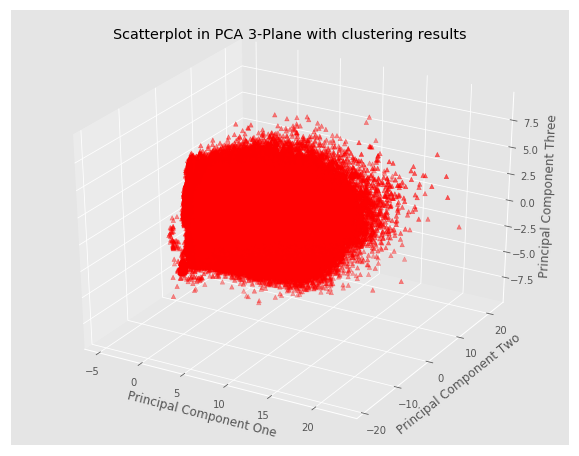

In [15]:
matplotlib_3D_X_reduced(re_pca)

In [16]:
y = kmeans_cluster(re_pca,5)

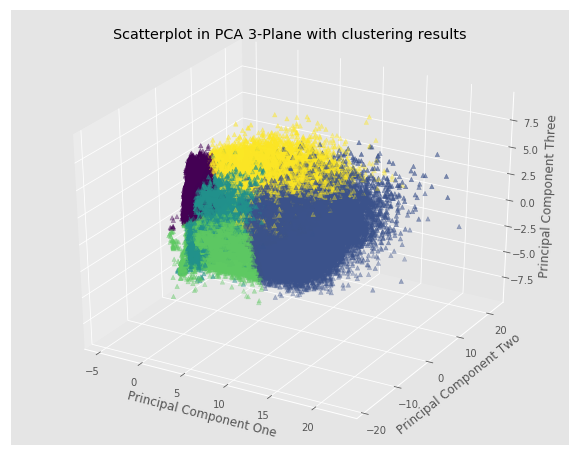

In [8]:
plot_3D_kmeans(re_pca,y) #5 clusters

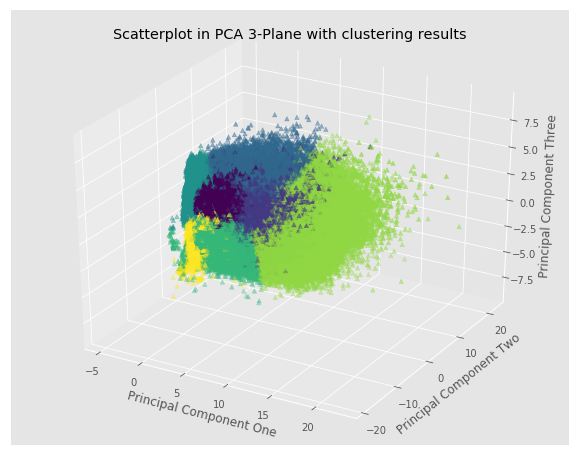

In [8]:
plot_3D_kmeans(re_pca,y) #7 clusters

In [9]:
# from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
# re_pca.shape

(1017355, 3)

In [11]:
# subset_five_percent = pd.DataFrame(re_pca,index=y).sample(50867).reset_index().rename({'index':'y'},axis=1).values

In [ ]:
# silhouette_avg = silhouette_score(subset_five_percent[:,1:4], subset_five_percent[:,0])

# Interpret cluster & radar plot

In [29]:
# df = drop_columns(normal) #drop the columns we don't use 
# df = convert_datetime(df)
# df = convert_to_peroid(df)
# df = create_donation_tip_col(df)
# df = fill_cont_nans(df)
# df = dummify(df)
# # df = logify(df)
# ndf = convert_cat_into_int(df)

In [30]:
ndf.shape

(1017355, 349)

In [78]:
ndf['cluster'] = y #feature engineered but not scaled dataframe

In [79]:
ndf_scaled = pd.DataFrame(X,columns=ndf.columns[:-1])

In [80]:
ndf_scaled['cluster'] = y #make sure it's the same y

In [81]:
ndf.head()

ACCOUNT_AGE_MONTHS  IS_CORPORATE_CAMPAIGN_USER  IS_FREE_TRIAL_USER  \
1                 101                           0                   0   
2                 100                           0                   0   
3                 119                           0                   0   
4                  81                           0                   0   
5                 133                           0                   0   

   IS_INACTIVE_CREDIT_DONOR  LIFETIME_DONATION_TOTAL  LIFETIME_DEPOSIT_TOTAL  \
1                     False                     0.00               68.010002   
2                     False                     7.50               57.500000   
3                     False                    11.25               55.310001   
4                     False                     3.75               28.750000   
5                     False                    30.00              135.179993   

   LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL  LIFETIME_PROXY_LOAN_PURCHASE_TOTAL  \
1                                 125.0                                   0   
2                                  50.0                                   0   
3                                 100.0                                   0   
4                                  50.0                                   0   
5                                 200.0                                   0   

   LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM  FIRST_YEAR_DEPOSIT_TOTAL  \
1                                      17.600                       0.0   
2                                      24.000                       0.0   
3                                      21.500                       0.0   
4                                      15.500                       0.0   
5                                      19.875                       0.0   

    ...     USER_LOCATION_COUNTRY_nan  FIRST_LOAN_REGION_Asia  \
1   ...                             0                       1   
2   ...                             0                       0   
3   ...                             0                       0   
4   ...                             0                       1   
5   ...                             0                       0   

   FIRST_LOAN_REGION_Central America  FIRST_LOAN_REGION_Eastern Europe  \
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   
5                                  0                                 0   

   FIRST_LOAN_REGION_Middle East  FIRST_LOAN_REGION_North America  \
1                              0                                0   
2                              0                                1   
3                              1                                0   
4                              0                                0   
5                              0                                0   

   FIRST_LOAN_REGION_Oceania  FIRST_LOAN_REGION_South America  \
1                          0                                0   
2                          0                                0   
3                          0                                0   
4                          0                                0   
5                          0                                0   

   FIRST_LOAN_REGION_nan  cluster  
1                      0        2  
2                      0        4  
3                      0        2  
4                      0        2  
5                      0        0  

[5 rows x 350 columns]

In [82]:
ndf_scaled.head()

ACCOUNT_AGE_MONTHS  IS_CORPORATE_CAMPAIGN_USER  IS_FREE_TRIAL_USER  \
0            1.179216                   -0.659101           -0.418403   
1            1.149626                   -0.659101           -0.418403   
2            1.711837                   -0.659101           -0.418403   
3            0.587415                   -0.659101           -0.418403   
4            2.126098                   -0.659101           -0.418403   

   IS_INACTIVE_CREDIT_DONOR  LIFETIME_DONATION_TOTAL  LIFETIME_DEPOSIT_TOTAL  \
0                 -0.361959                -0.572384                2.204778   
1                 -0.361959                 0.149594                1.766881   
2                 -0.361959                 0.510583                1.675636   
3                 -0.361959                -0.211395                0.569021   
4                 -0.361959                 2.315528                5.003395   

   LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL  LIFETIME_PROXY_LOAN_PURCHASE_TOTAL  \
0                              0.915523                                 0.0   
1                             -0.163050                                 0.0   
2                              0.555999                                 0.0   
3                             -0.163050                                 0.0   
4                              1.994097                                 0.0   

   LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM  FIRST_YEAR_DEPOSIT_TOTAL  \
0                                   -0.005250                 -0.657395   
1                                    0.528823                 -0.657395   
2                                    0.320201                 -0.657395   
3                                   -0.180493                 -0.657395   
4                                    0.184596                 -0.657395   

    ...     USER_LOCATION_COUNTRY_nan  FIRST_LOAN_REGION_Asia  \
0   ...                     -0.833801                1.738045   
1   ...                     -0.833801               -0.575359   
2   ...                     -0.833801               -0.575359   
3   ...                     -0.833801                1.738045   
4   ...                     -0.833801               -0.575359   

   FIRST_LOAN_REGION_Central America  FIRST_LOAN_REGION_Eastern Europe  \
0                          -0.305681                         -0.201911   
1                          -0.305681                         -0.201911   
2                          -0.305681                         -0.201911   
3                          -0.305681                         -0.201911   
4                          -0.305681                         -0.201911   

   FIRST_LOAN_REGION_Middle East  FIRST_LOAN_REGION_North America  \
0                      -0.249150                        -0.354867   
1                      -0.249150                         2.817955   
2                       4.013643                        -0.354867   
3                      -0.249150                        -0.354867   
4                      -0.249150                        -0.354867   

   FIRST_LOAN_REGION_Oceania  FIRST_LOAN_REGION_South America  \
0                  -0.111768                        -0.411957   
1                  -0.111768                        -0.411957   
2                  -0.111768                        -0.411957   
3                  -0.111768                        -0.411957   
4                  -0.111768                        -0.411957   

   FIRST_LOAN_REGION_nan  cluster  
0              -0.252209        2  
1              -0.252209        4  
2              -0.252209        2  
3              -0.252209        2  
4              -0.252209        0  

[5 rows x 350 columns]

In [220]:
ndf_scaled.groupby('cluster').count().iloc[:,0]

cluster
0     99285
1    393610
2    185551
3     60749
4    278160
Name: ACCOUNT_AGE_MONTHS, dtype: int64

In [221]:
ndf.groupby('cluster').count().iloc[:,0]/ndf.shape[0]

cluster
0    0.097591
1    0.386895
2    0.182386
3    0.059713
4    0.273415
Name: ACCOUNT_AGE_MONTHS, dtype: float64

In [83]:
cluster_mean = ndf.groupby(['cluster']).mean()

In [37]:
cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']]

LIFETIME_DONATION_TOTAL  LIFETIME_DEPOSIT_TOTAL  \
cluster                                                    
0                       0.294275                1.312679   
1                       7.891865               32.736088   
2                      12.038256                5.317368   
3                       0.049195                0.197912   
4                      15.941183               51.404003   

         LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL  
cluster                                        
0                                  144.845946  
1                                   33.894641  
2                                   61.487451  
3                                   30.940385  
4                                  207.360176

In [34]:
cluster_mean.columns

Index(['ACCOUNT_AGE_MONTHS', 'IS_CORPORATE_CAMPAIGN_USER',
       'IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR',
       'LIFETIME_DONATION_TOTAL', 'LIFETIME_DEPOSIT_TOTAL',
       'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
       'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
       'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
       'FIRST_YEAR_DEPOSIT_TOTAL',
       ...
       'USER_LOCATION_COUNTRY_British Indian Ocean Territory',
       'USER_LOCATION_COUNTRY_nan', 'FIRST_LOAN_REGION_Asia',
       'FIRST_LOAN_REGION_Central America', 'FIRST_LOAN_REGION_Eastern Europe',
       'FIRST_LOAN_REGION_Middle East', 'FIRST_LOAN_REGION_North America',
       'FIRST_LOAN_REGION_Oceania', 'FIRST_LOAN_REGION_South America',
       'FIRST_LOAN_REGION_nan'],
      dtype='object', length=349)

In [198]:
list(cluster_mean.columns)

['ACCOUNT_AGE_MONTHS',
 'IS_CORPORATE_CAMPAIGN_USER',
 'IS_FREE_TRIAL_USER',
 'IS_INACTIVE_CREDIT_DONOR',
 'LIFETIME_DONATION_TOTAL',
 'LIFETIME_DEPOSIT_TOTAL',
 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
 'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
 'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
 'FIRST_YEAR_DEPOSIT_TOTAL',
 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
 'FIRST_YEAR_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DEPOSIT_TOTAL',
 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DONATION_TOTAL',
 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
 'NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES',
 'NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS',
 'NUM_DISTINCT_COUNTRIES_LENT_TO',
 'NUM_AFRICA_LOANS',
 'NUM_ASIA_L

In [199]:
radar1_plus = cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','ACCOUNT_AGE_MONTHS']]

In [201]:
radar1_scaled_plus = scaled_cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','ACCOUNT_AGE_MONTHS']]

In [84]:
radar1 = cluster_mean[['LIFETIME_DONATION_TOTAL',
       'LIFETIME_DEPOSIT_TOTAL', 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL']]

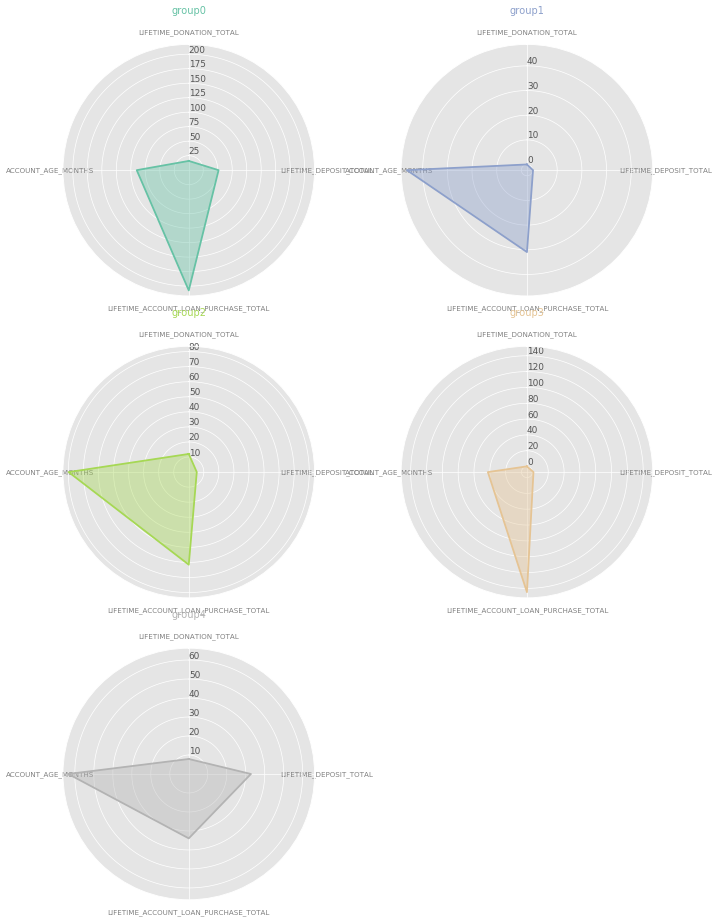

In [200]:
plot_radar(radar1_plus)

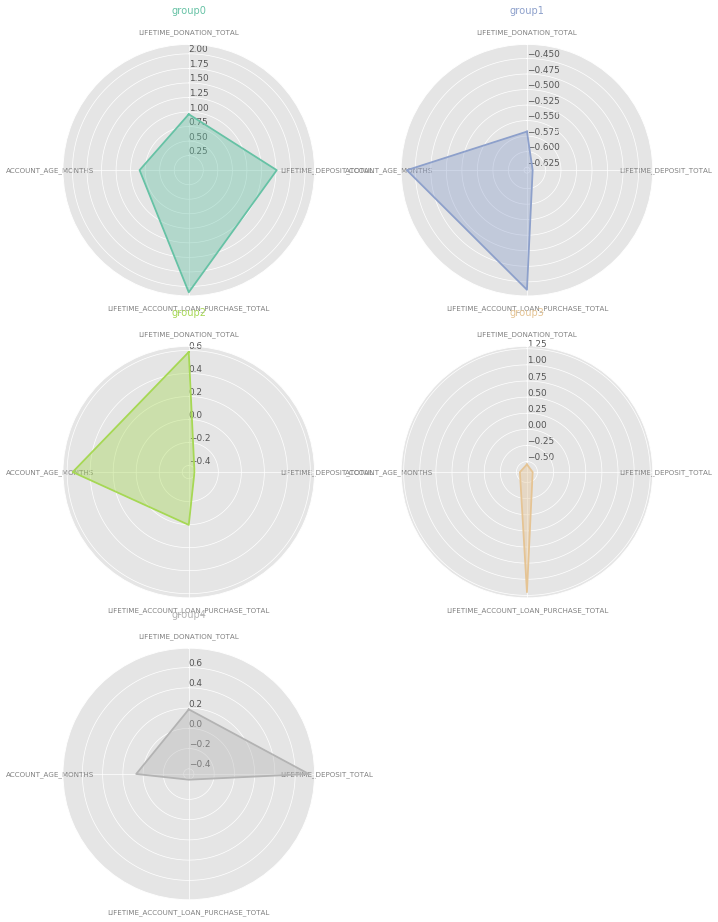

In [202]:
plot_radar(radar1_scaled_plus)

In [214]:
normal['VINTAGE_MONTH'][normal['VINTAGE_MONTH'] >201705]

1499446    201706
1499447    201706
1499448    201706
1499451    201706
1499452    201706
1499453    201707
1499455    201707
1499503    201706
1499504    201706
1499505    201706
1499506    201706
1499507    201706
1499509    201706
1499510    201706
1499511    201707
1499513    201707
1499514    201707
1499548    201706
1499549    201706
1499551    201706
1499552    201706
1499553    201706
1499555    201706
1499556    201706
1499557    201706
1499558    201707
1499559    201707
1499565    201707
1499601    201706
1499602    201706
1499604    201706
1499605    201706
1499606    201706
1499607    201706
1499608    201706
1499609    201707
1499611    201707
1499674    201706
1499675    201706
1499676    201706
1499677    201706
1499678    201706
1499679    201707
1499683    201706
1499727    201706
1499728    201706
1499730    201706
1499731    201706
1499733    201706
1499736    201707
1499738    201707
1499739    201707
1499776    201706
1499778    201707
1499779    201707
1499780   

In [222]:
cluster_mean[['ACCOUNT_AGE_MONTHS','LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL','lifetime_ave_tip_rate','LIFETIME_DEPOSIT_TOTAL','LIFETIME_DONATION_TOTAL']]

ACCOUNT_AGE_MONTHS  LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL  \
cluster                                                             
0                 89.736335                            207.396586   
1                 46.397894                             30.933234   
2                 79.810731                             61.498521   
3                 42.440040                            144.770449   
4                 63.453254                             33.900075   

         lifetime_ave_tip_rate  LIFETIME_DEPOSIT_TOTAL  \
cluster                                                  
0                     0.091504               51.410358   
1                     0.005408                0.198000   
2                    16.667554                5.318899   
3                     0.002059                1.309590   
4                    51.629428               32.736870   

         LIFETIME_DONATION_TOTAL  
cluster                           
0                      15.941097  
1                       0.049243  
2                      12.039250  
3                       0.293250  
4                       7.892545

In [223]:
12/61

0.19672131147540983

In [30]:
# Libraries
from math import pi

In [85]:
def make_spider(df, row, title, color):
#     plt.figure(figsize=(8,6))
    # number of variable
    categories=list(df)
    N = len(categories)

    # number of variable
    categories=list(df)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    #plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
    #plt.ylim(0,40)

    # Ind1
    values=df.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

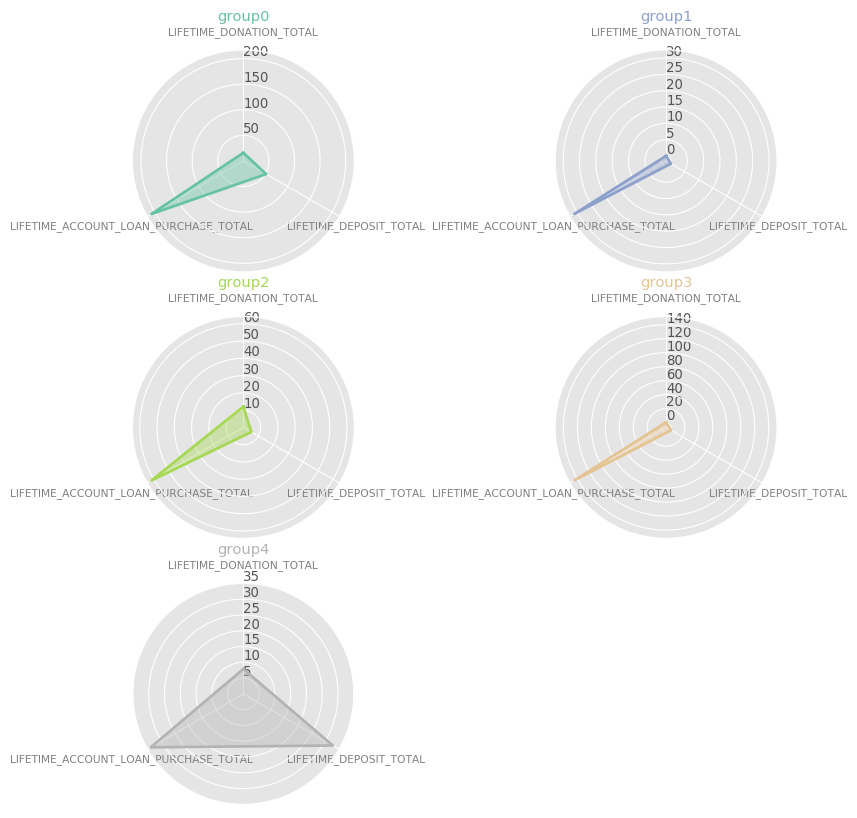

In [86]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar1.index))
 
# Loop to plot
for row in range(0, len(radar1.index)):
    make_spider(df=radar1, row=row, title='group{}'.format(row), color=my_palette(row))


In [87]:
scaled_cluster_mean = ndf_scaled.groupby('cluster').mean()

In [40]:
scaled_cluster_mean

ACCOUNT_AGE_MONTHS  IS_CORPORATE_CAMPAIGN_USER  IS_FREE_TRIAL_USER  \
cluster                                                                       
0                  0.845924                   -0.642946           -0.294592   
1                 -0.436463                    0.706467            0.576214   
2                  0.552224                   -0.655840           -0.352063   
3                 -0.553576                    1.413614           -0.378784   
4                  0.068206                   -0.641434           -0.392647   

         IS_INACTIVE_CREDIT_DONOR  LIFETIME_DONATION_TOTAL  \
cluster                                                      
0                       -0.256653                 0.962165   
1                       -0.359339                -0.567644   
2                        0.729114                 0.586559   
3                       -0.361238                -0.544155   
4                        0.192616                 0.187382   

         LIFETIME_DEPOSIT_TOTAL  LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL  \
cluster                                                                 
0                      1.513158                              2.100467   
1                     -0.620589                             -0.437249   
2                     -0.407229                              0.002310   
3                     -0.574275                              1.199842   
4                      0.735133                             -0.394583   

         LIFETIME_PROXY_LOAN_PURCHASE_TOTAL  \
cluster                                       
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

         LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM  FIRST_YEAR_DEPOSIT_TOTAL  \
cluster                                                                         
0                                         -0.151321                  1.010265   
1                                          0.008318                 -0.654525   
2                                         -0.138861                 -0.594768   
3                                          0.195258                 -0.637496   
4                                          0.092227                  1.101563   

                 ...            \
cluster          ...             
0                ...             
1                ...             
2                ...             
3                ...             
4                ...             

         USER_LOCATION_COUNTRY_British Indian Ocean Territory  \
cluster                                                         
0                                                      0.0      
1                                                      0.0      
2                                                      0.0      
3                                                      0.0      
4                                                      0.0      

         USER_LOCATION_COUNTRY_nan  FIRST_LOAN_REGION_Asia  \
cluster                                                      
0                        -0.740464                0.060282   
1                         0.455467                0.092214   
2                         0.233347                0.062030   
3                         0.333585                0.036722   
4                        -0.608722               -0.201402   

         FIRST_LOAN_REGION_Central America  FIRST_LOAN_REGION_Eastern Europe  \
cluster                                                                        
0                                -0.004773                         -0.061839   
1                                 0.038475                          0.065594   
2                                 0.056110                         -0.028593   
3                                 0.146302                          0.246694   


In [88]:
radar1_scaled = scaled_cluster_mean.iloc[:,4:7]

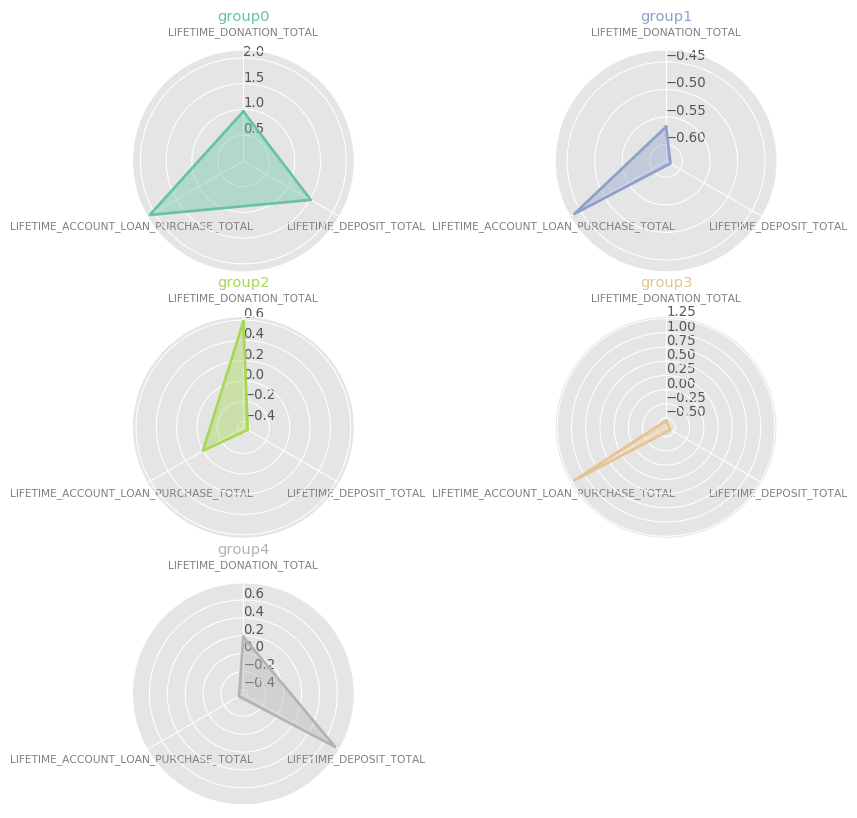

In [89]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar1_scaled.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar1_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

### First Year

In [95]:
radar2 = cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL']]

In [96]:
radar2_scaled = scaled_cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL']]

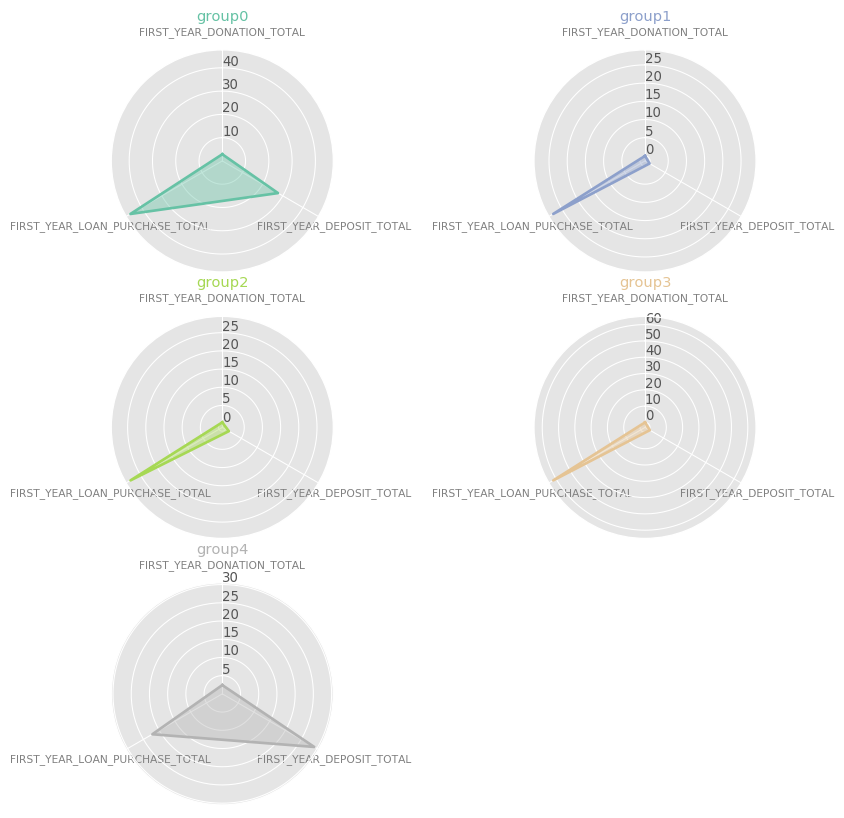

In [97]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar2.index))
 
# Loop to plot
for row in range(0, len(radar1.index)):
    make_spider(df=radar2, row=row, title='group{}'.format(row), color=my_palette(row))


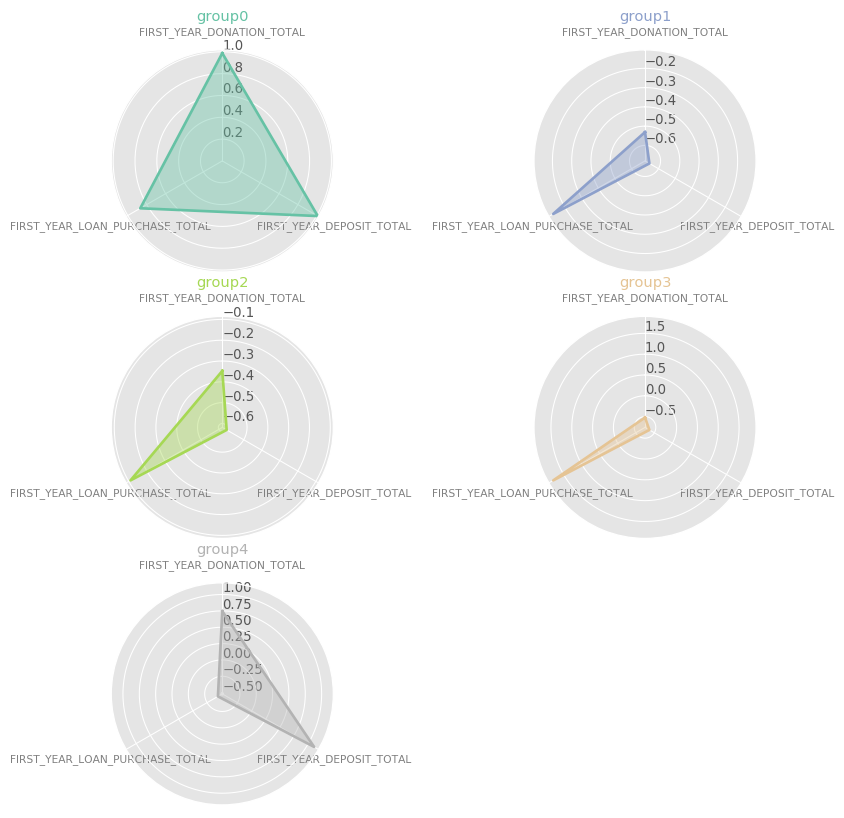

In [98]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar2_scaled.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar2_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [127]:
radar2_plus = cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL',"FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL",'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL']]

In [128]:
radar2_scaled_plus = scaled_cluster_mean[['FIRST_YEAR_DONATION_TOTAL',"FIRST_YEAR_DEPOSIT_TOTAL",'FIRST_YEAR_LOAN_PURCHASE_TOTAL',"FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL",'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL']]

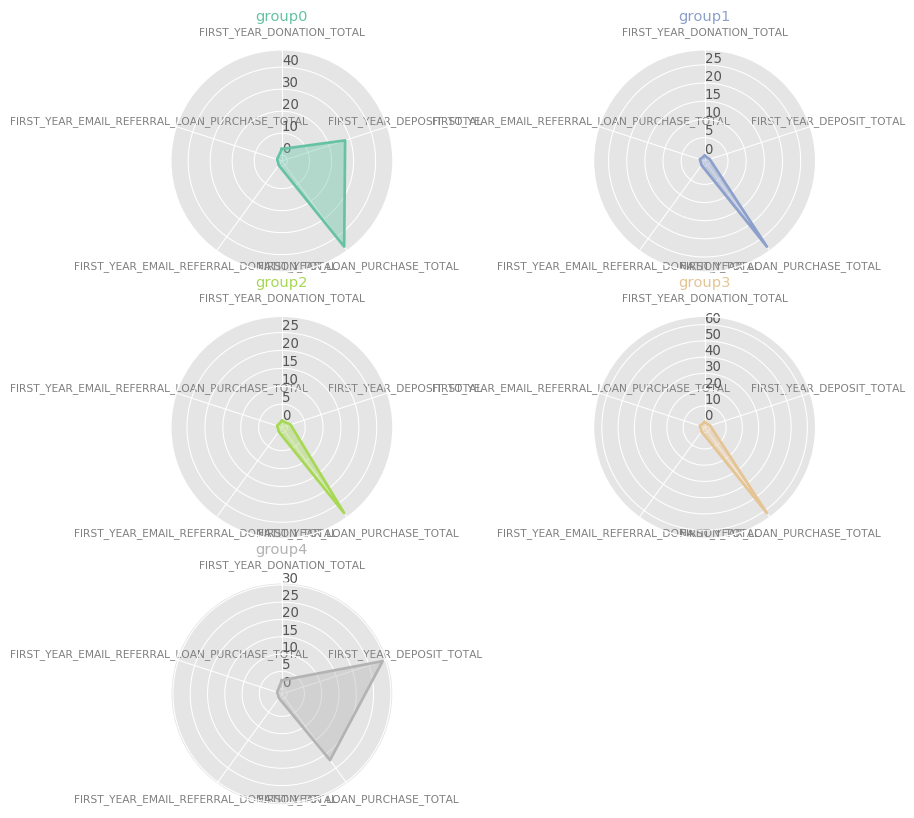

In [129]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar2_plus.index))
 
# Loop to plot
for row in range(0, len(radar2_plus.index)):
    make_spider(df=radar2_plus, row=row, title='group{}'.format(row), color=my_palette(row))


### First Day

In [99]:
radar3 = cluster_mean[['FIRST_DAY_DONATION_TOTAL',"FIRST_DAY_DEPOSIT_TOTAL",'FIRST_DAY_LOAN_PURCHASE_TOTAL']]

In [101]:
radar3_scaled = scaled_cluster_mean[['FIRST_DAY_DONATION_TOTAL',"FIRST_DAY_DEPOSIT_TOTAL",'FIRST_DAY_LOAN_PURCHASE_TOTAL']]

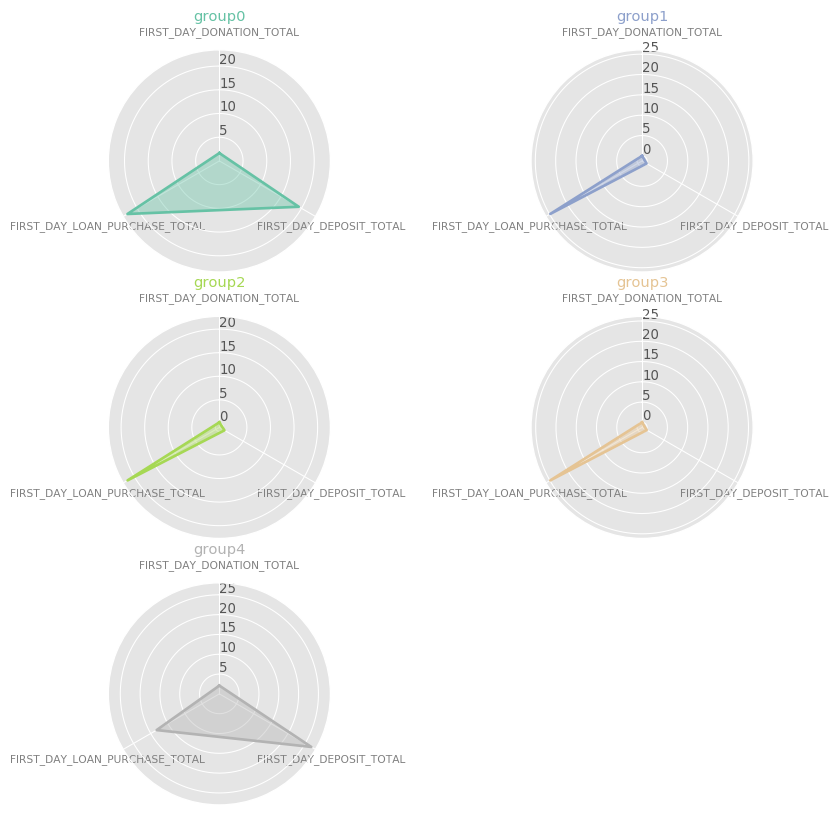

In [103]:
# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar3.index))
 
# Loop to plot
for row in range(0, len(radar1.index)):
    make_spider(df=radar3, row=row, title='group{}'.format(row), color=my_palette(row))


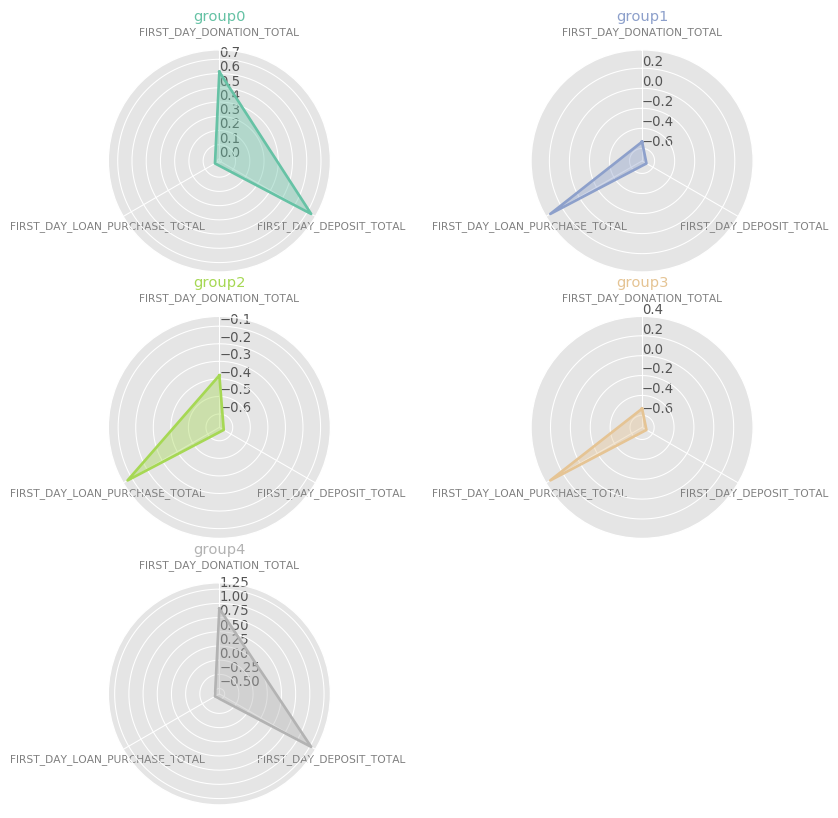

In [104]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar3_scaled.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar3_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [111]:
list(cluster_mean.columns)

['ACCOUNT_AGE_MONTHS',
 'IS_CORPORATE_CAMPAIGN_USER',
 'IS_FREE_TRIAL_USER',
 'IS_INACTIVE_CREDIT_DONOR',
 'LIFETIME_DONATION_TOTAL',
 'LIFETIME_DEPOSIT_TOTAL',
 'LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL',
 'LIFETIME_PROXY_LOAN_PURCHASE_TOTAL',
 'LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM',
 'FIRST_YEAR_DEPOSIT_TOTAL',
 'FIRST_YEAR_LOAN_PURCHASE_TOTAL',
 'FIRST_YEAR_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DEPOSIT_TOTAL',
 'FIRST_DAY_LOAN_PURCHASE_TOTAL',
 'FIRST_DAY_DONATION_TOTAL',
 'FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM',
 'NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES',
 'NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS',
 'NUM_DISTINCT_COUNTRIES_LENT_TO',
 'NUM_AFRICA_LOANS',
 'NUM_ASIA_L

In [107]:
radar4 = cluster_mean[['IS_CORPORATE_CAMPAIGN_USER','IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR']]

In [109]:
radar4_scaled = scaled_cluster_mean[['IS_CORPORATE_CAMPAIGN_USER','IS_FREE_TRIAL_USER', 'IS_INACTIVE_CREDIT_DONOR']]

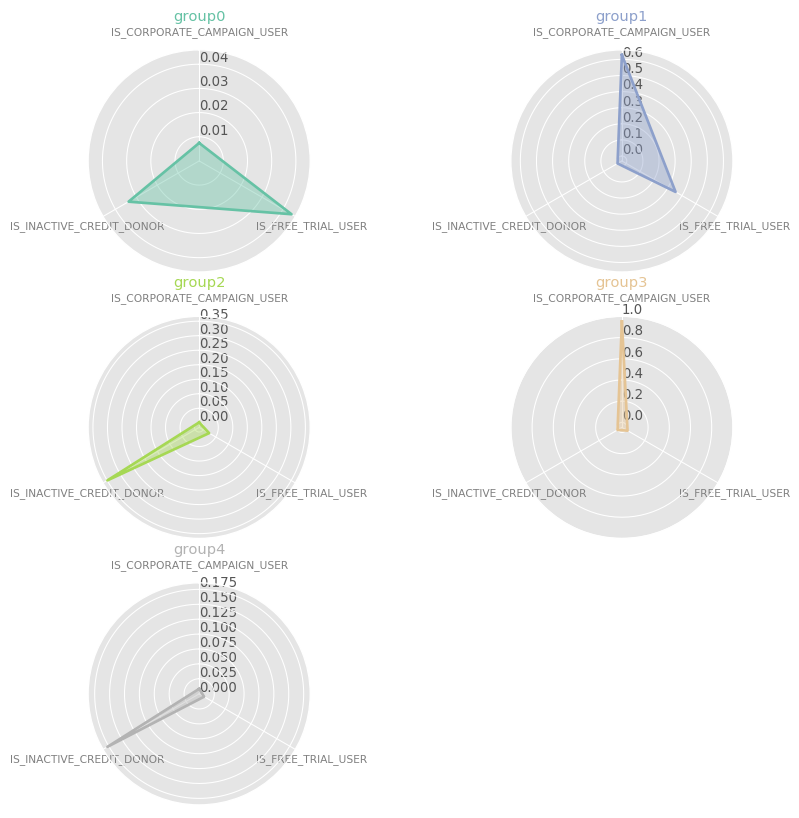

In [108]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar4.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar4, row=row, title='group{}'.format(row), color=my_palette(row))

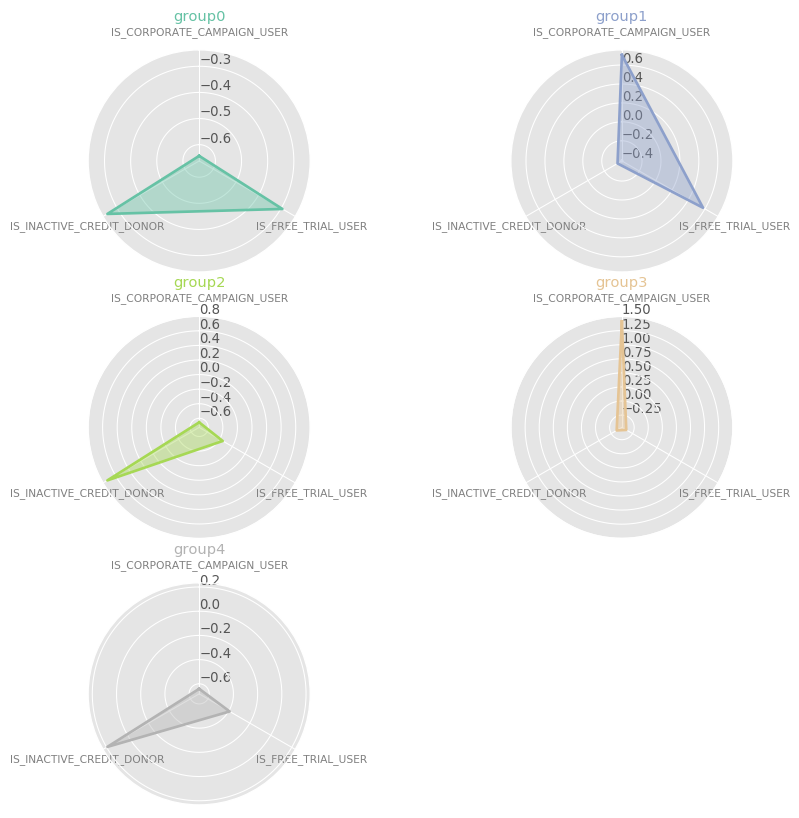

In [110]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar4_scaled.index))

for row in range(0, len(radar1_scaled.index)):
    make_spider(df=radar4_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [112]:
radar5 = cluster_mean[['NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES']]

In [113]:
radar5_scaled = scaled_cluster_mean[['NUM_TEAM_MEMBERSHIPS',
 'NUM_TEAM_LOANS',
 'NUM_TEAM_MESSAGES']]

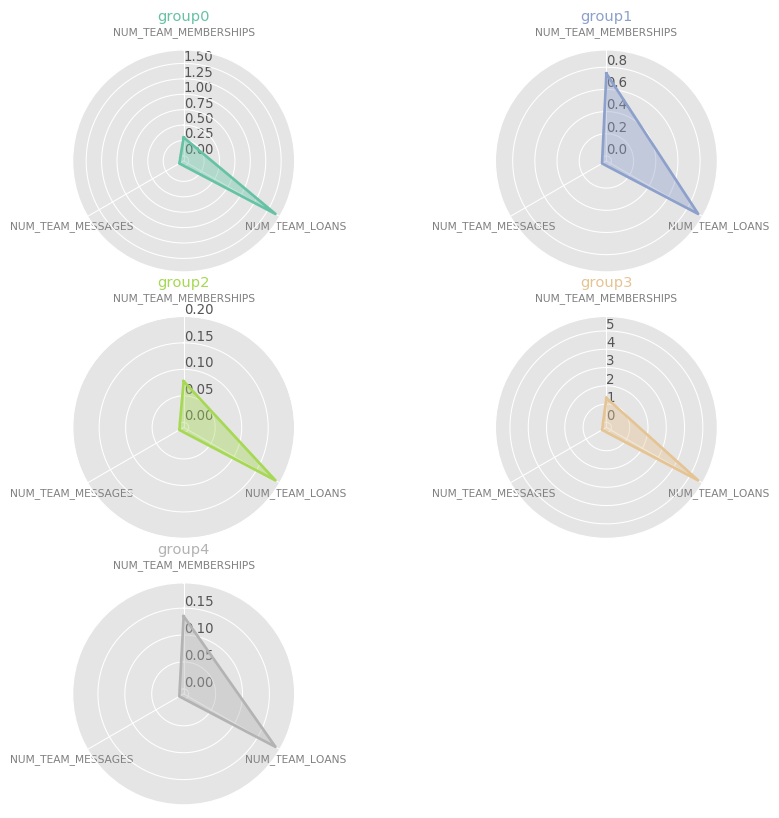

In [115]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar5.index))

for row in range(0, len(radar5_scaled.index)):
    make_spider(df=radar5, row=row, title='group{}'.format(row), color=my_palette(row))

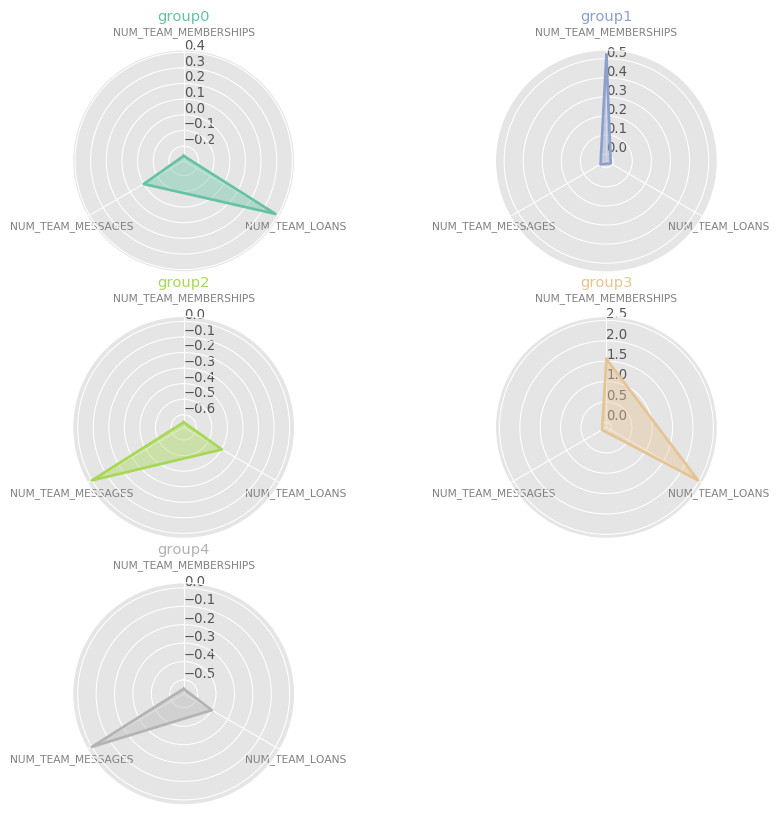

In [114]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar5_scaled.index))

for row in range(0, len(radar5_scaled.index)):
    make_spider(df=radar5_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [116]:
radar6 = cluster_mean[['NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS']]


In [117]:
radar6_scaled = scaled_cluster_mean[['NUM_LOAN_COMMENTS',
 'NUM_JOURNAL_COMMENTS',
 'NUM_STATEMENT_COMMENTS']]


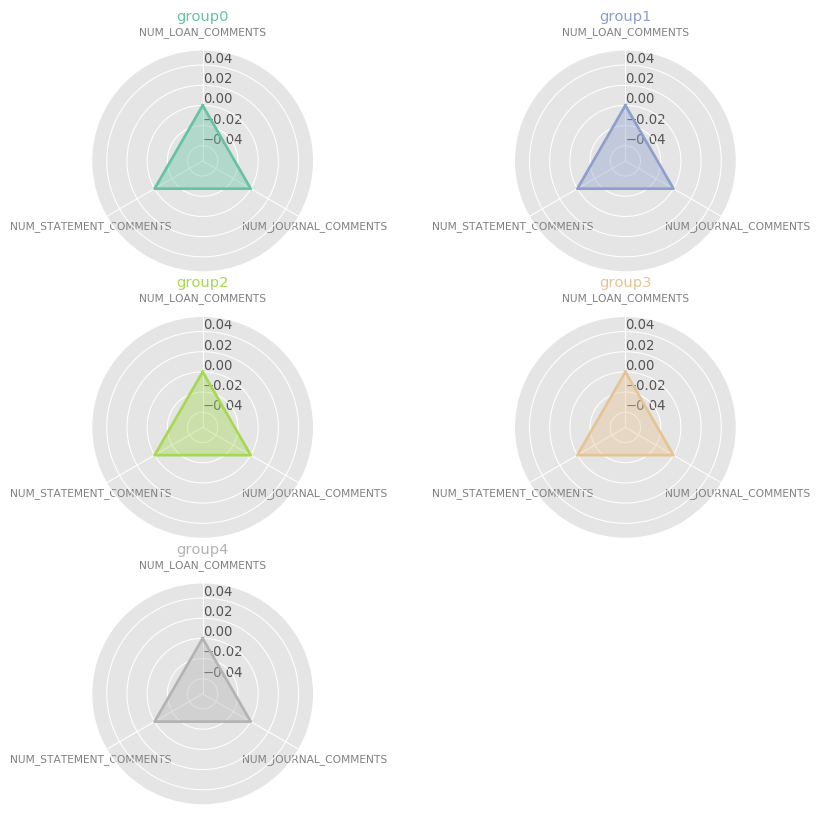

In [119]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar6.index))

for row in range(0, len(radar6.index)):
    make_spider(df=radar6, row=row, title='group{}'.format(row), color=my_palette(row))

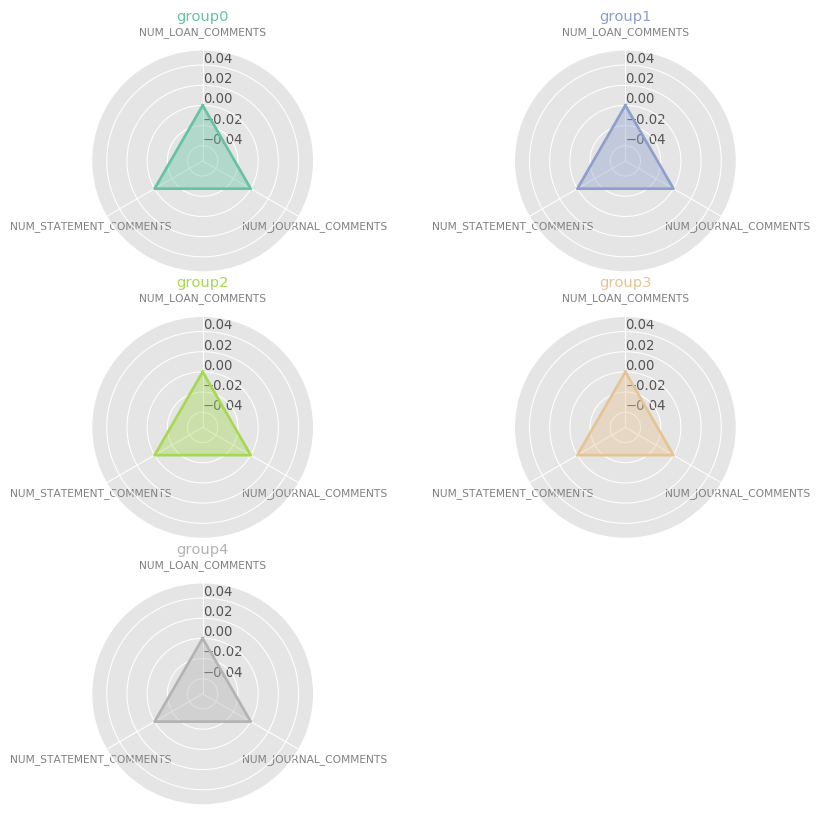

In [118]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar6_scaled.index))

for row in range(0, len(radar6_scaled.index)):
    make_spider(df=radar6_scaled, row=row, title='group{}'.format(row), color=my_palette(row))

In [120]:
radar7 = cluster_mean[['FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM'
 ]]

In [121]:
radar7_scaled = scaled_cluster_mean[['FIRST_YEAR_DEPOSIT_OCCASION_NUM',
 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM',
 'FIRST_YEAR_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM',
 'FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM'
 ]]

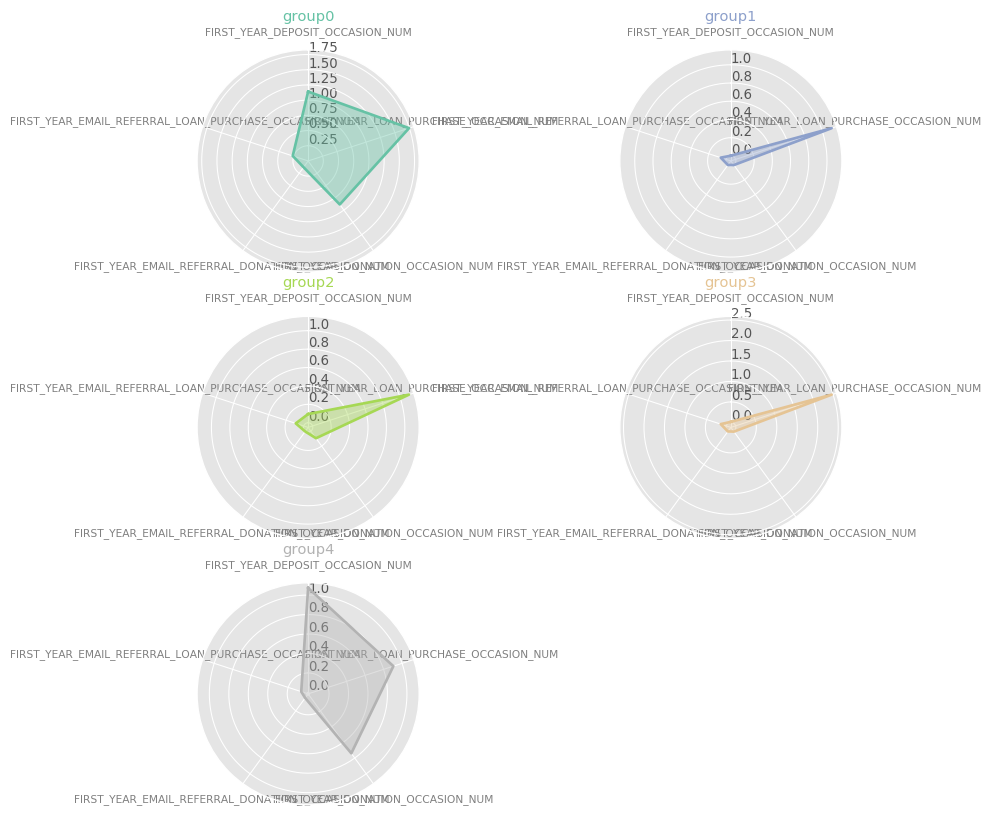

In [122]:
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(radar7.index))

for row in range(0, len(radar7.index)):
    make_spider(df=radar7, row=row, title='group{}'.format(row), color=my_palette(row))

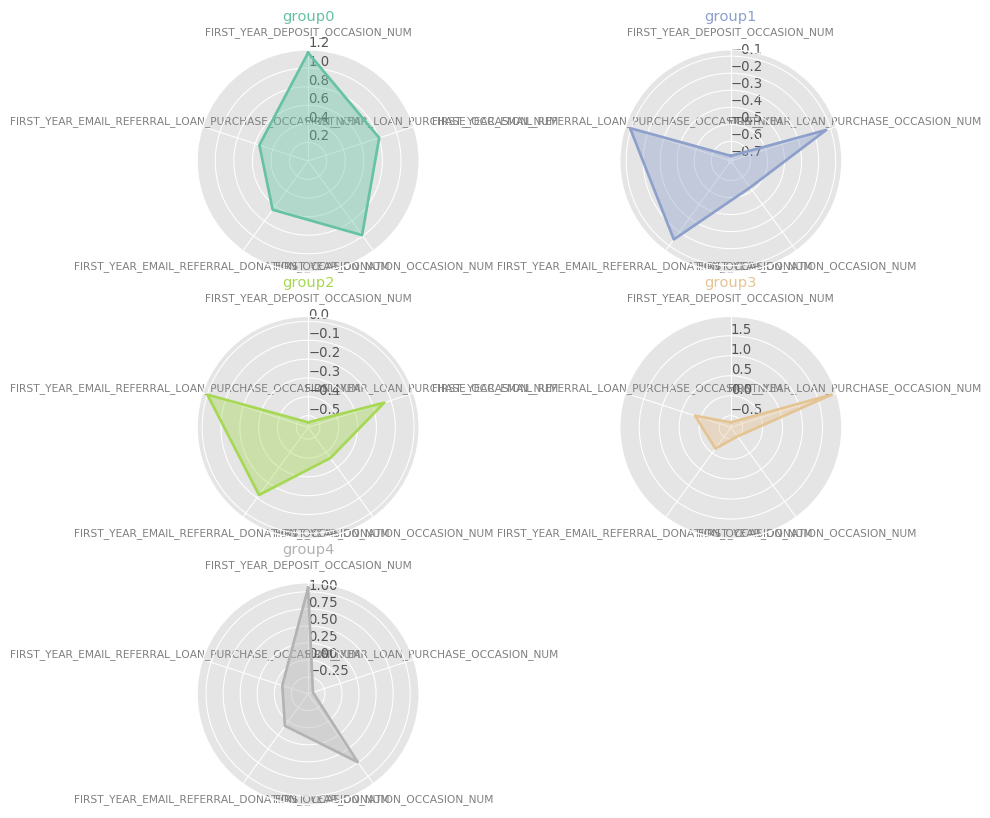

In [125]:
def plot_radar(df):
    # initialize the figure
    my_dpi=96
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(df.index))

    for row in range(0, len(df.index)):
        make_spider(df=df, row=row, title='group{}'.format(row), color=my_palette(row))

In [131]:
list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))

['FIRST_TRANSACTION_REFERRAL_giftcard',
 'FIRST_TRANSACTION_REFERRAL_invited',
 'FIRST_TRANSACTION_REFERRAL_invited_team',
 'FIRST_TRANSACTION_REFERRAL_marketing',
 'FIRST_TRANSACTION_REFERRAL_online_ad',
 'FIRST_TRANSACTION_REFERRAL_search',
 'FIRST_TRANSACTION_REFERRAL_social',
 'FIRST_TRANSACTION_REFERRAL_system_email',
 'FIRST_TRANSACTION_REFERRAL_unknown',
 'FIRST_TRANSACTION_REFERRAL_video_site']

In [132]:
radar8 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))]

In [138]:
normal['cluster'] = y

In [141]:
normal.groupby(['cluster','FIRST_TRANSACTION_REFERRAL']).count().iloc[:,0]

cluster  FIRST_TRANSACTION_REFERRAL
0        direct                          5197
         giftcard                       23485
         invited                        13914
         invited_team                    1046
         marketing                       1752
         online_ad                        355
         search                          4278
         social                           893
         system_email                     302
         unknown                        47976
         video_site                        87
1        direct                        120386
         giftcard                        5659
         invited                        94858
         invited_team                   20464
         marketing                       5798
         online_ad                        355
         search                          3002
         social                          2574
         system_email                    1317
         unknown                       13909

In [153]:
radar8_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("FIRST_TRANSACTION_REFERRAL")))]

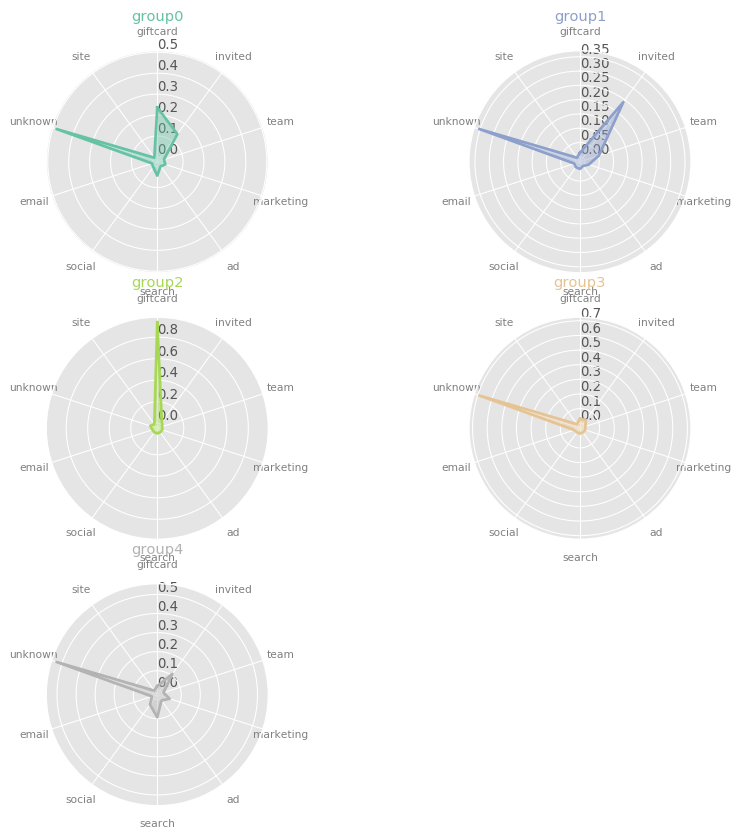

In [152]:
plot_radar(radar8,category=True)

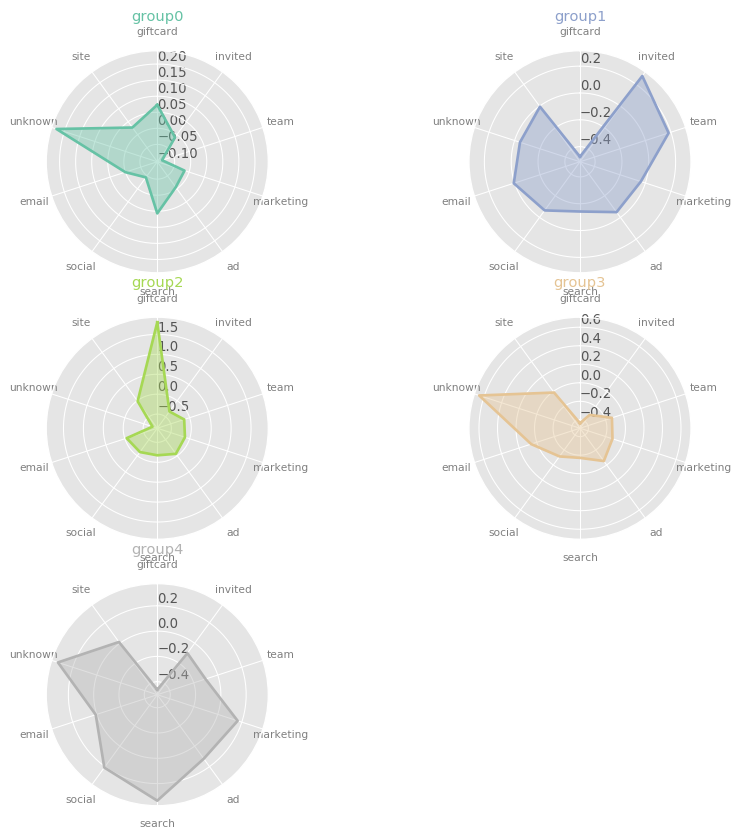

In [154]:
plot_radar(radar8_scaled,category=True)

In [155]:
radar9 = cluster_mean[list(cluster_mean.filter(regex=("FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY")))]

In [156]:
radar9_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY")))]

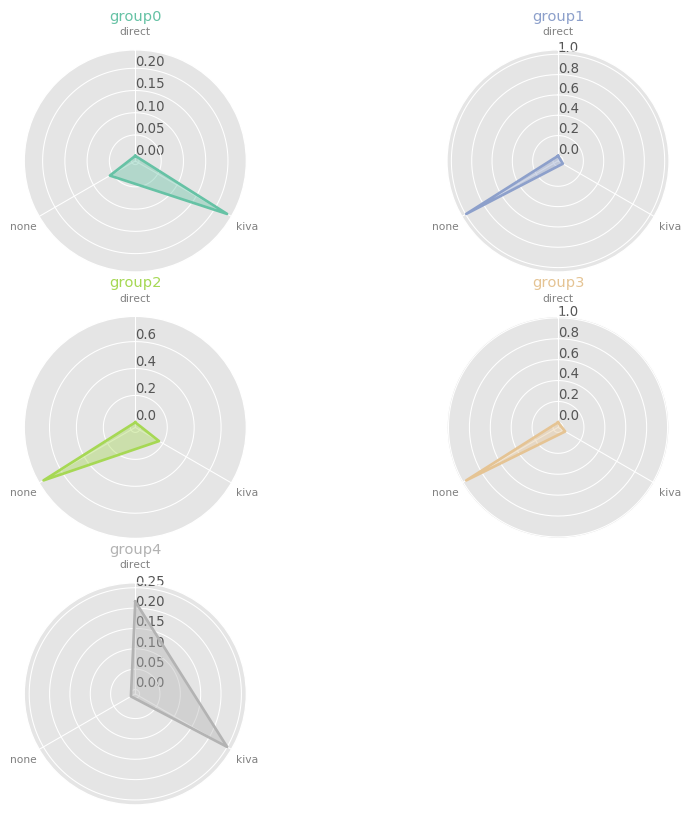

In [157]:
plot_radar(radar9,category=True)

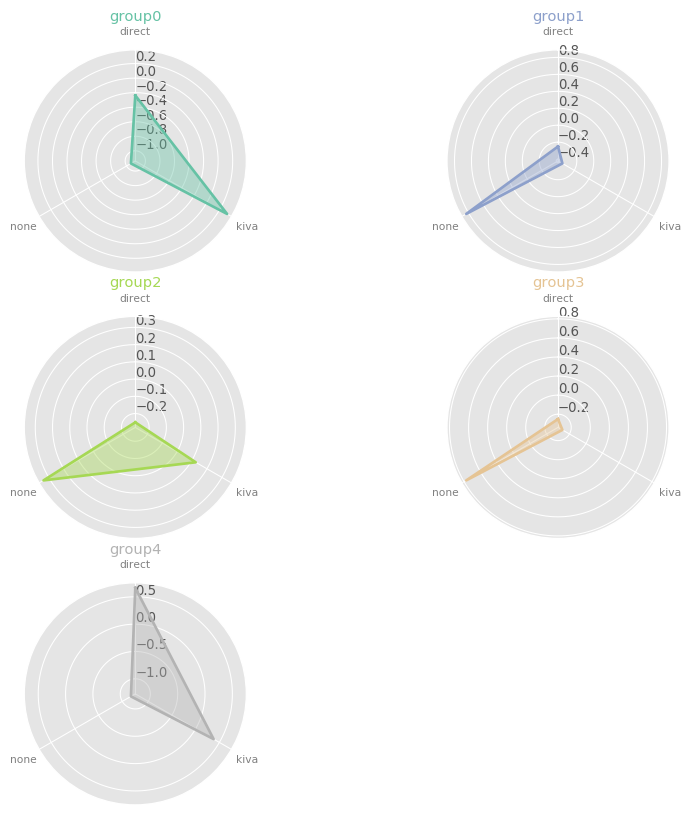

In [158]:
plot_radar(radar9_scaled,category=True)

In [162]:
list(cluster_mean.filter(regex=("NUM_BUNDLE")))

['NUM_BUNDLE_GREEN_LOANS',
 'NUM_BUNDLE_HIGHER_ED_LOANS',
 'NUM_BUNDLE_ISLAMIC_FINANCE_LOANS',
 'NUM_BUNDLE_YOUTH_LOANS',
 'NUM_BUNDLE_STARTUP_LOANS',
 'NUM_BUNDLE_WATER_LOANS',
 'NUM_BUNDLE_VULNERABLE_LOANS',
 'NUM_BUNDLE_FAIR_TRADE_LOANS',
 'NUM_BUNDLE_MOBILE_TECH_LOANS',
 'NUM_BUNDLE_RURAL_LOANS',
 'NUM_BUNDLE_UNDERFUNDED_LOANS',
 'NUM_BUNDLE_CONFLICT_ZONE_LOANS',
 'NUM_BUNDLE_JOB_CREATION_SME_LOANS',
 'NUM_BUNDLE_GROWING_BUSINESSES_LOANS',
 'NUM_BUNDLE_HEALTH_LOANS',
 'NUM_BUNDLE_DISASTER_RECOVERY_LOANS',
 'NUM_BUNDLE_INNOVATIVE_LOANS',
 'NUM_BUNDLE_REFUGEE_LOANS',
 'NUM_BUNDLE_SOCIAL_ENTERPRISE_LOANS',
 'NUM_BUNDLE_CLEAN_ENERGY_LOANS',
 'NUM_BUNDLE_SOLAR_LOANS']

In [159]:
radar10 = cluster_mean[list(cluster_mean.filter(regex=("NUM_BUNDLE")))]

In [160]:
radar10_scaled = scaled_cluster_mean[list(cluster_mean.filter(regex=("NUM_BUNDLE")))]

In [164]:
categories=list(radar10)

In [170]:
cat =[]
for c in categories:
    cat.append(" ".join(c.split("_")[2:-1]))

In [171]:
cat

['GREEN',
 'HIGHER ED',
 'ISLAMIC FINANCE',
 'YOUTH',
 'STARTUP',
 'WATER',
 'VULNERABLE',
 'FAIR TRADE',
 'MOBILE TECH',
 'RURAL',
 'UNDERFUNDED',
 'CONFLICT ZONE',
 'JOB CREATION SME',
 'GROWING BUSINESSES',
 'HEALTH',
 'DISASTER RECOVERY',
 'INNOVATIVE',
 'REFUGEE',
 'SOCIAL ENTERPRISE',
 'CLEAN ENERGY',
 'SOLAR']

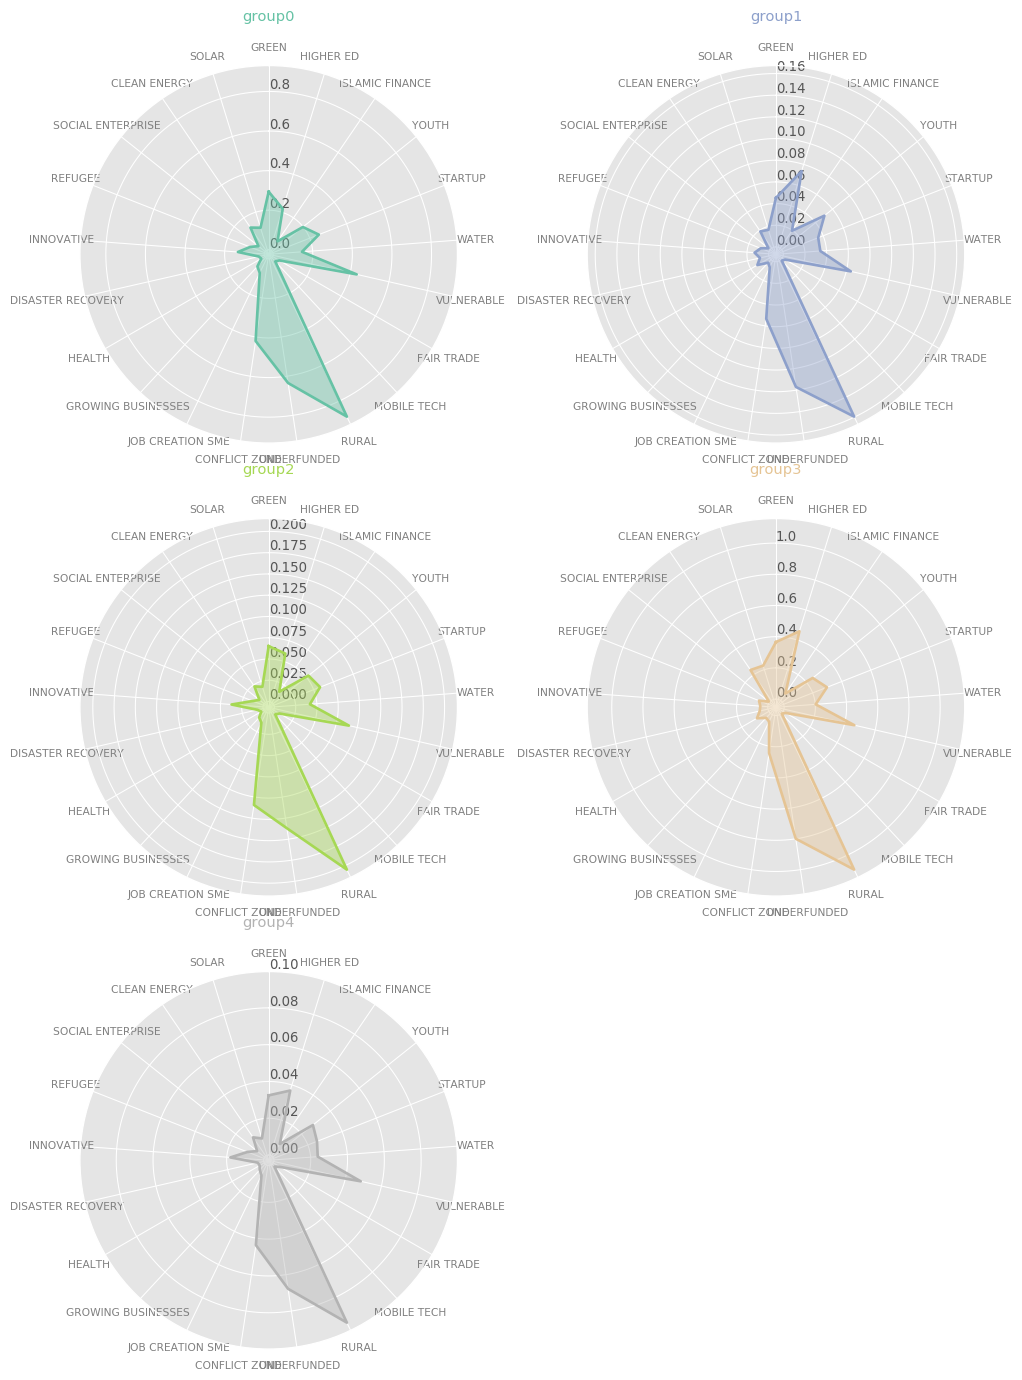

In [194]:
plot_radar(radar10,category=False,num_of_cat=True)

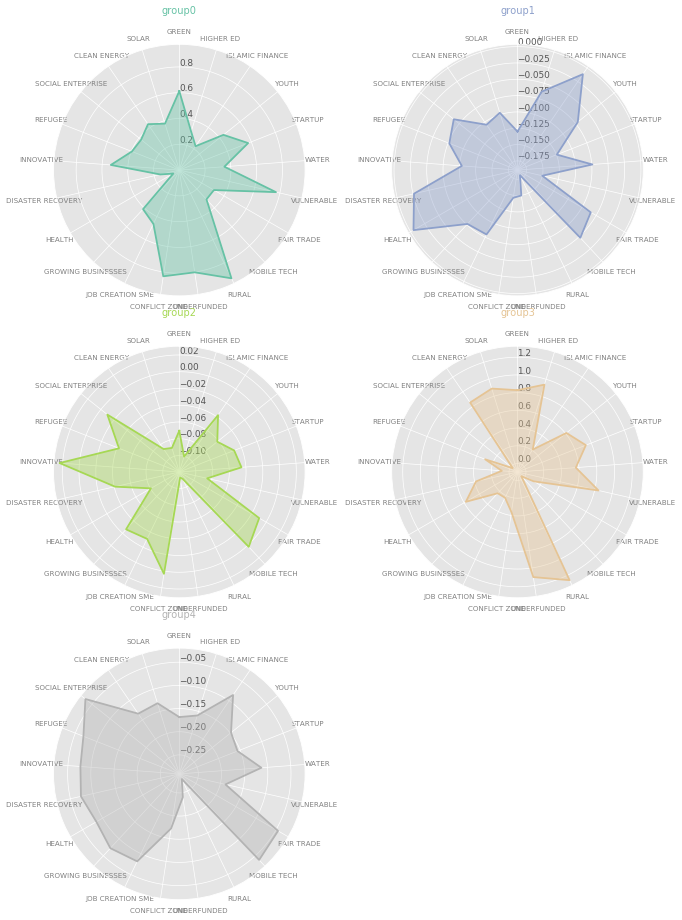

In [197]:
plot_radar(radar10_scaled,dpi=64,num_of_cat=True)

## without loan preference -- PCA + Kmeans

In [194]:
re_X, imp_t = PCA_reduce(X,3)

#0 Principle Component top 5 contributors are: [ 5 14  9 17 36]
#1 Principle Component top 5 contributors are: [ 32 303  15  10  18]
#2 Principle Component top 5 contributors are: [ 1  4 45 52 37]
Reduced X shape: (1017355, 3)
Explained variance: [9.10892193 4.6657714  3.84525684]
Explained variance ratio: [0.03312332 0.01696642 0.01398274]
Explained variance ratio accumulated: [0.03312332 0.05008974 0.06407248]


In [198]:
counter = print_imp_features(ls,imp_t)

Counter({'LIFETIME_DEPOSIT_TOTAL': 1, 'FIRST_DAY_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_TOTAL': 1, 'FIRST_YEAR_DEPOSIT_OCCASION_NUM': 1, 'FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none': 1, 'last_login_today': 1, 'FIRST_LOAN_REGION_nan': 1, 'FIRST_DAY_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_TOTAL': 1, 'FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM': 1, 'IS_CORPORATE_CAMPAIGN_USER': 1, 'LIFETIME_DONATION_TOTAL': 1, 'FIRST_TRANSACTION_REFERRAL_unknown': 1, 'FIRST_BASKET_CATEGORY_Kiva Card Redeemer': 1, 'FIRST_TRANSACTION_REFERRAL_giftcard': 1})


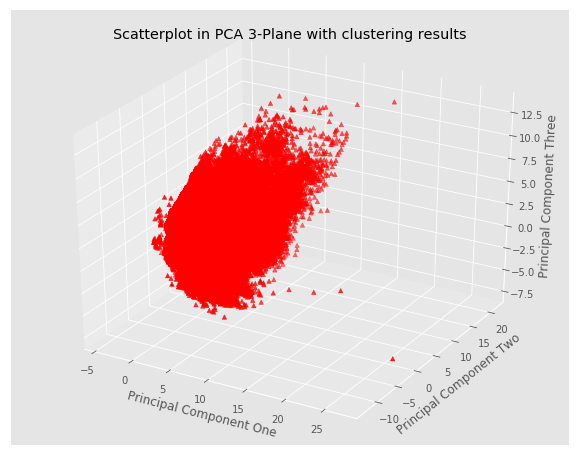

In [195]:
matplotlib_3D_X_reduced(re_X)

In [199]:
y, assigned_cluster = kmeans_cluster(re_X,10)

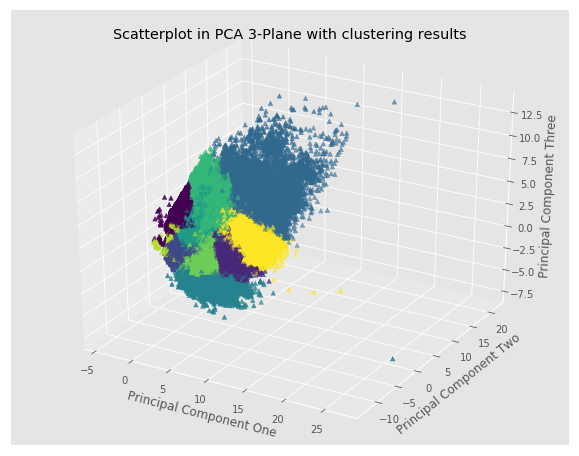

In [200]:
plot_3D_kmeans(re_X,y)

In [202]:
np.argmax(re_X[:,0])

188798

In [204]:
ls.iloc[188798,:]

ACCOUNT_AGE_MONTHS                                                      124
IS_CORPORATE_CAMPAIGN_USER                                                0
IS_FREE_TRIAL_USER                                                        0
IS_INACTIVE_CREDIT_DONOR                                              False
LIFETIME_DONATION_TOTAL                                                30.1
LIFETIME_DEPOSIT_TOTAL                                                 30.1
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL                                   0.01
LIFETIME_PROXY_LOAN_PURCHASE_TOTAL                                        0
LIFETIME_LENDER_WEIGHTED_AVERAGE_LOAN_TERM                               14
FIRST_YEAR_DEPOSIT_TOTAL                                               23.2
FIRST_YEAR_LOAN_PURCHASE_TOTAL                                            0
FIRST_YEAR_DONATION_TOTAL                                                 0
FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL                                  0
FIRST_YEAR_E

NameError: name 'ls' is not defined